In [1]:
import numpy as np
import pandas as pd
from pathlib import Path


In [2]:
# Setting up data directory
data_dir = Path("data")

In [3]:
# Load train.csv file from data directory
train_file = data_dir / "train.csv"
training_data = pd.read_csv(train_file)

In [6]:
# training data columns
training_data.columns
# sample rows
training_data.head()

,ImageID,distance,location
0,0,351,"[215, 158]"
1,1,372,"[228, 269]"
2,2,488,"[255, 386]"
3,3,308,"[306, 426]"
4,4,67,"[248, 338]"


Distance: 351, Location: [215, 158]


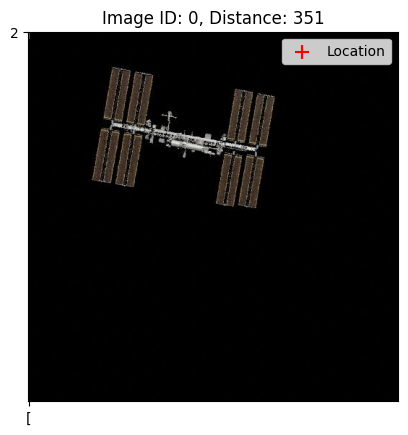

In [7]:
# Display a sample jpg image from data/train and the corresponding distance and location from trining_data
# # Overlay a red point on the image at the location specified in training_data
# Set image id
from matplotlib import pyplot as plt


image_id = 0
# Load the image
image_file = data_dir / "train" / f"{image_id}.jpg"
image = plt.imread(image_file)
# Display the image
plt.imshow(image)
# Get the corresponding distance and location from training_data
distance = training_data.loc[image_id, 'distance']
location = training_data.loc[image_id, 'location']
# Overlay a red *crosshair* on the image at the location specified in training_data
plt.scatter(location[0], location[1], color='red', s=100, marker='+', label='Location')
plt.title(f"Image ID: {image_id}, Distance: {distance}")
print(f"Distance: {distance}, Location: {location}")
plt.legend()
plt.show()


In [ ]:
# Image resolution
image_resolution = (image.shape[0], image.shape[1])
print(f"Image Resolution: {image_resolution}")

Image Resolution: (512, 512)


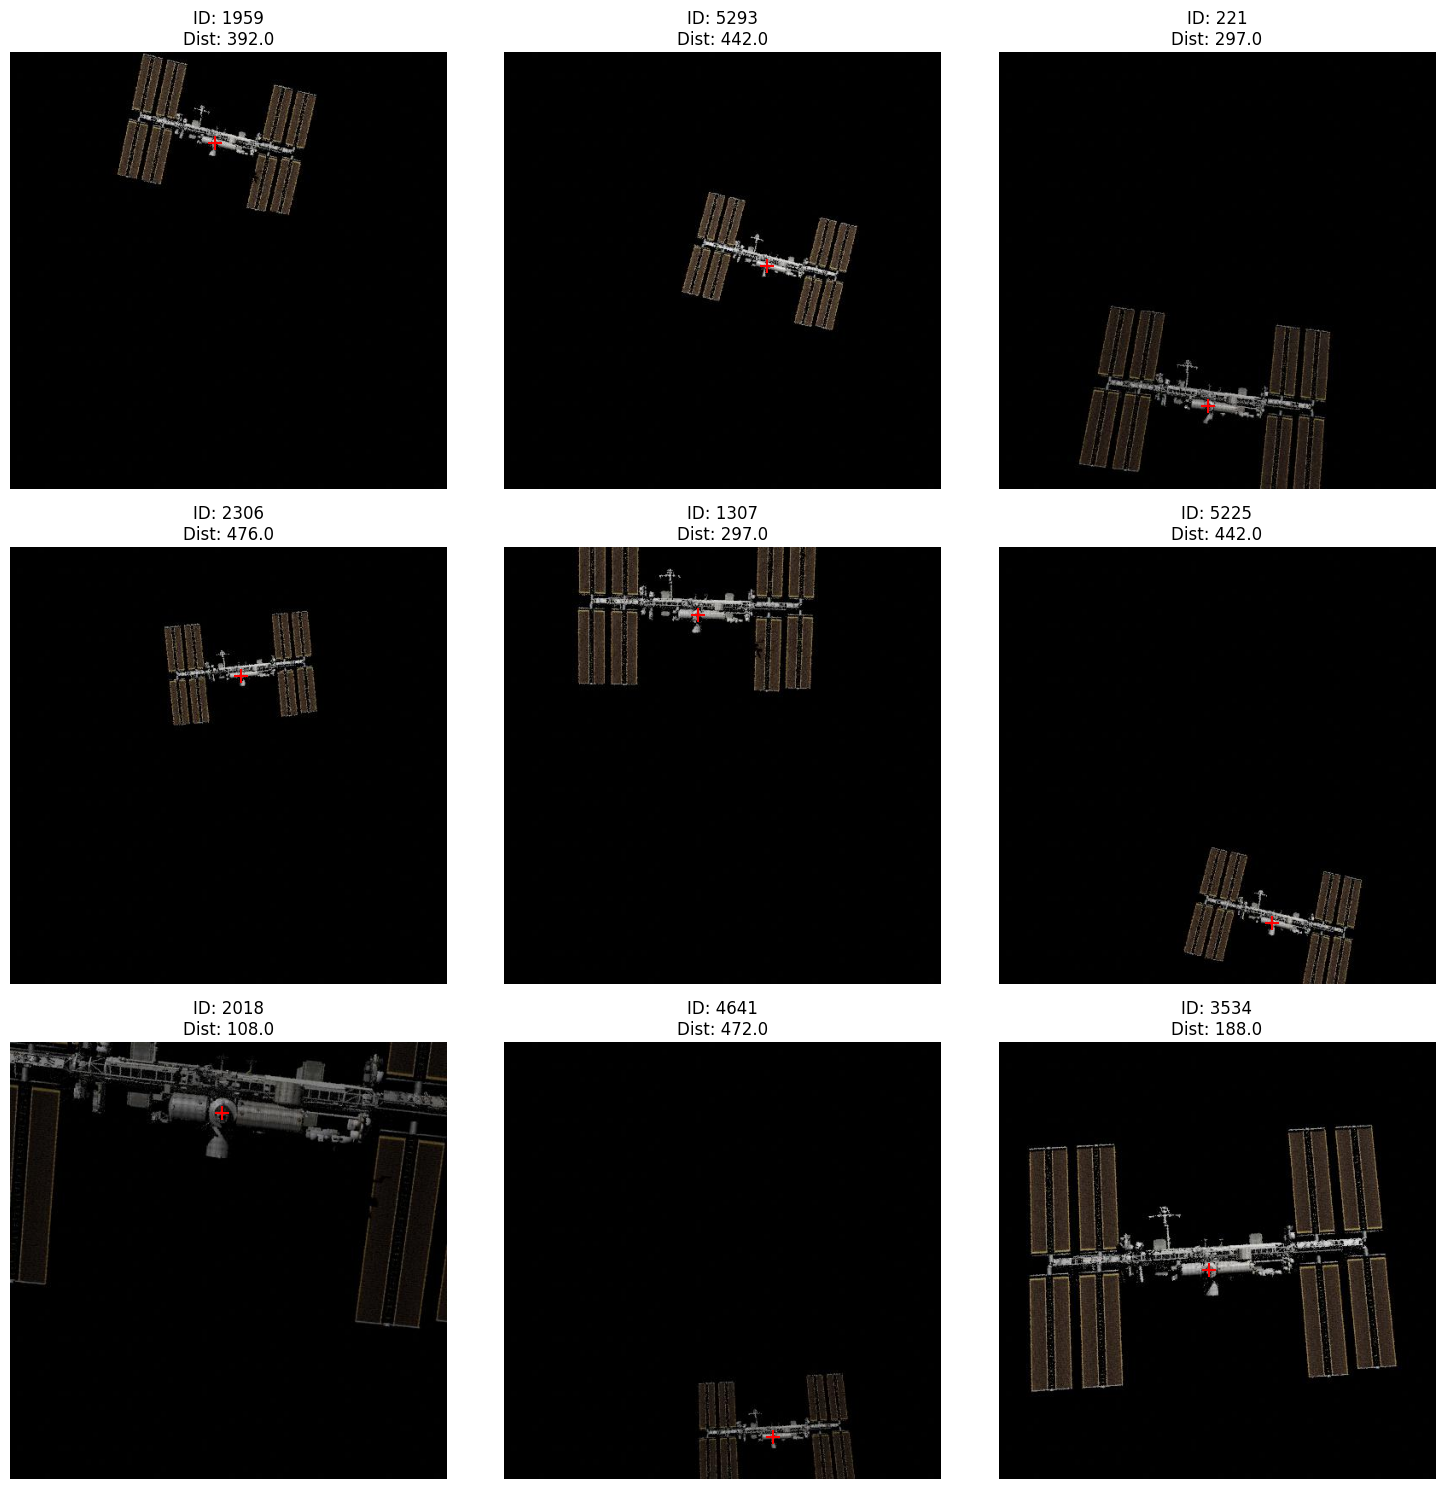

In [10]:
# Create a grid of sample images with crosshairs
import matplotlib.pyplot as plt
import ast

def plot_image_with_crosshair(ax, image_id):
    # Load the image
    image_file = data_dir / "train" / f"{image_id}.jpg"
    image = plt.imread(image_file)
    
    # Display the image
    ax.imshow(image)
    
    # Get location and distance
    distance = training_data.loc[image_id, 'distance']
    location_str = training_data.loc[image_id, 'location']
    location = ast.literal_eval(location_str)
    
    # Plot crosshair
    ax.scatter(location[0], location[1], color='red', s=100, marker='+', label='Location')
    ax.set_title(f"ID: {image_id}\nDist: {distance:.1f}")
    ax.axis('off')

# Create a 3x3 grid of random sample images
plt.figure(figsize=(15, 15))
sample_ids = np.random.choice(training_data.index, 9, replace=False)

for i, image_id in enumerate(sample_ids):
    ax = plt.subplot(3, 3, i+1)
    plot_image_with_crosshair(ax, image_id)

plt.tight_layout()
plt.show()

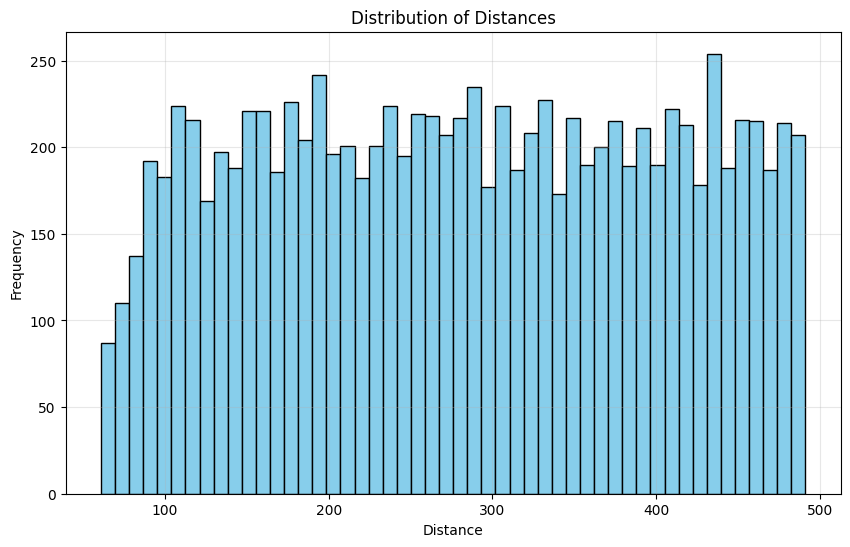

Mean distance: 282.47
Median distance: 282.00
Min distance: 61.00
Max distance: 491.00


In [8]:
# Analyze the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(training_data['distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate some statistics
print(f"Mean distance: {training_data['distance'].mean():.2f}")
print(f"Median distance: {training_data['distance'].median():.2f}")
print(f"Min distance: {training_data['distance'].min():.2f}")
print(f"Max distance: {training_data['distance'].max():.2f}")

In [4]:
# Dataset Overview and Basic Statistics
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Total number of samples: {len(training_data)}")
print(f"Dataset shape: {training_data.shape}")
print(f"Data types:\n{training_data.dtypes}")
print(f"\nMissing values:\n{training_data.isnull().sum()}")
print(f"\nDataset memory usage: {training_data.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Basic statistics
print("\n" + "="*50)
print("DISTANCE STATISTICS")
print("="*50)
distance_stats = training_data['distance'].describe()
print(distance_stats)

# Check for duplicates
print(f"\nDuplicate rows: {training_data.duplicated().sum()}")
print(f"Unique ImageIDs: {training_data['ImageID'].nunique()}")

DATASET OVERVIEW
Total number of samples: 10000
Dataset shape: (10000, 3)
Data types:
ImageID      int64
distance     int64
location    object
dtype: object

Missing values:
ImageID     0
distance    0
location    0
dtype: int64

Dataset memory usage: 809.85 KB

DISTANCE STATISTICS
count    10000.000000
mean       282.465300
std        120.648397
min         61.000000
25%        179.000000
50%        282.000000
75%        387.000000
max        491.000000
Name: distance, dtype: float64

Duplicate rows: 0
Unique ImageIDs: 10000


DISTANCE BINNING ANALYSIS
Distance Bin Analysis:
             distance                          x_coord        y_coord        
                count    mean    std  min  max    mean    std    mean     std
distance_bin                                                                 
Very Close       1733  109.10  22.98   61  147  265.28  37.14  277.53  123.40
Close            2078  190.22  24.64  148  233  265.90  37.36  284.70  124.14
Medium           2096  276.43  24.56  234  319  266.67  36.96  277.46  125.66
Far              2016  362.37  24.89  320  405  264.85  37.42  277.00  124.71
Very Far         2077  447.94  24.75  406  491  266.03  37.27  278.78  126.60


C:\Users\admin\AppData\Local\Temp\ipykernel_28212\3823454543.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = training_data.groupby('distance_bin').agg({


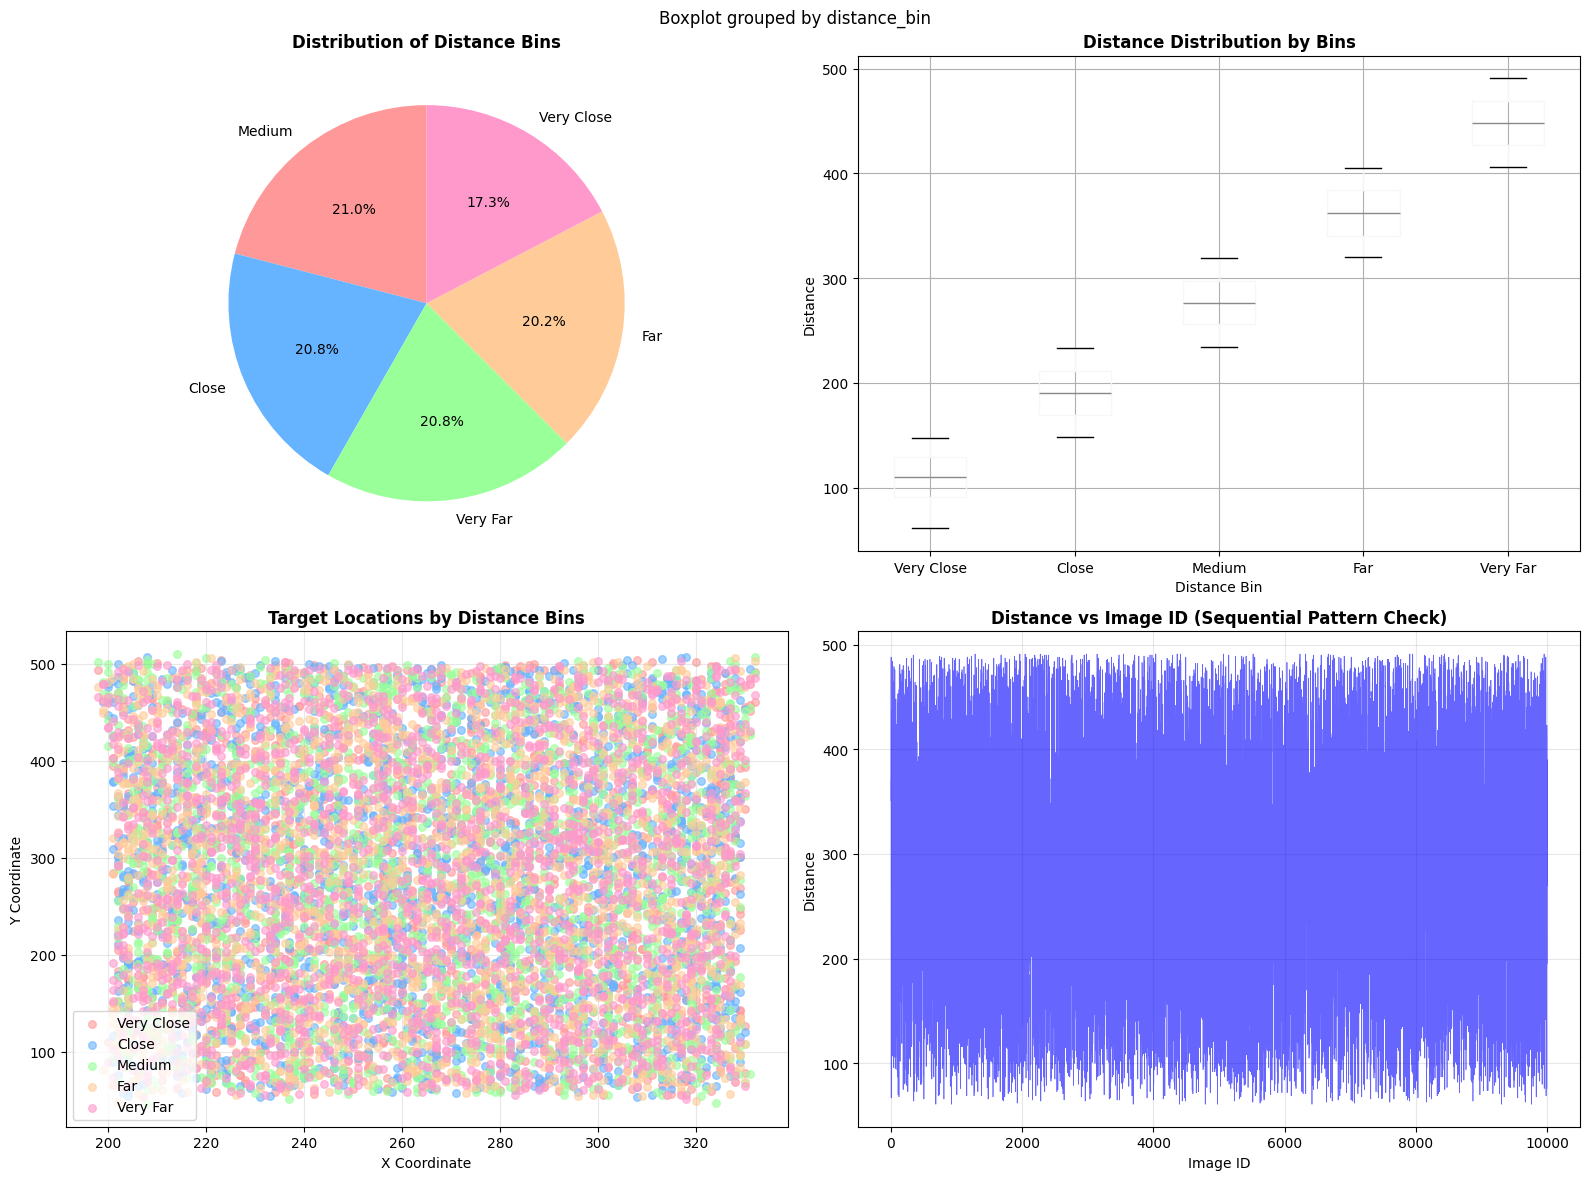

In [8]:
# Distance Binning and Target Zone Analysis
print("="*50)
print("DISTANCE BINNING ANALYSIS")
print("="*50)

# Create distance bins
training_data['distance_bin'] = pd.cut(training_data['distance'], 
                                     bins=5, labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far'])

# Analyze each bin
bin_analysis = training_data.groupby('distance_bin').agg({
    'distance': ['count', 'mean', 'std', 'min', 'max'],
    'x_coord': ['mean', 'std'],
    'y_coord': ['mean', 'std']
}).round(2)

print("Distance Bin Analysis:")
print(bin_analysis)

# Visualize distance bins
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distance bin distribution
bin_counts = training_data['distance_bin'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
axes[0,0].pie(bin_counts.values, labels=bin_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Distribution of Distance Bins', fontweight='bold')

# 2. Box plot by distance bins
training_data.boxplot(column='distance', by='distance_bin', ax=axes[0,1])
axes[0,1].set_title('Distance Distribution by Bins', fontweight='bold')
axes[0,1].set_xlabel('Distance Bin')
axes[0,1].set_ylabel('Distance')

# 3. Scatter plot with distance bins
for i, bin_name in enumerate(['Very Close', 'Close', 'Medium', 'Far', 'Very Far']):
    bin_data = training_data[training_data['distance_bin'] == bin_name]
    if not bin_data.empty:
        axes[1,0].scatter(bin_data['x_coord'], bin_data['y_coord'], 
                         label=bin_name, alpha=0.6, s=30, c=colors[i])

axes[1,0].set_title('Target Locations by Distance Bins', fontweight='bold')
axes[1,0].set_xlabel('X Coordinate')
axes[1,0].set_ylabel('Y Coordinate')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Distance vs ImageID to check for any patterns
axes[1,1].plot(training_data['ImageID'], training_data['distance'], 'b-', alpha=0.6, linewidth=0.5)
axes[1,1].set_title('Distance vs Image ID (Sequential Pattern Check)', fontweight='bold')
axes[1,1].set_xlabel('Image ID')
axes[1,1].set_ylabel('Distance')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

OUTLIER DETECTION
Distance outliers (|z-score| > 2.5): 0

IQR outliers: 0


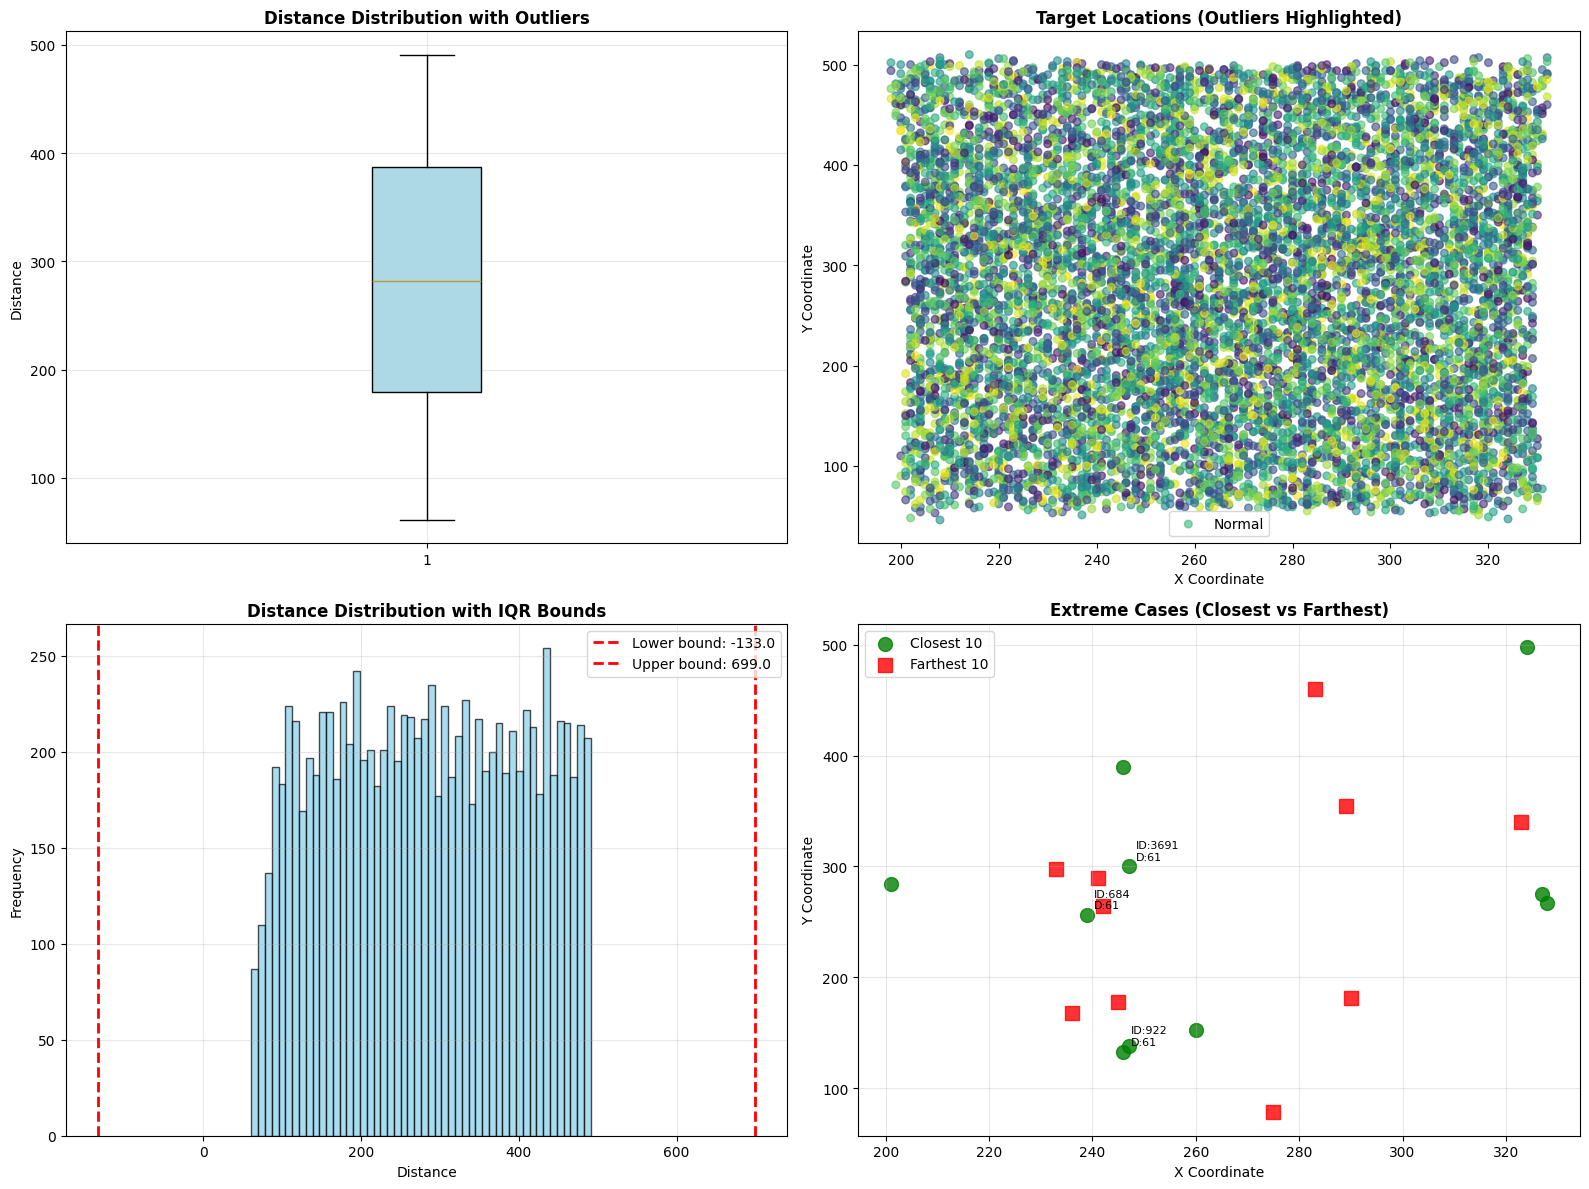


10 Closest targets (distance ≤ 62):
      ImageID  distance  x_coord  y_coord
684       684        61      239      256
922       922        61      246      133
3691     3691        61      247      300
4394     4394        61      327      275
4789     4789        61      260      152
4975     4975        61      328      267
6415     6415        61      247      138
9304     9304        61      246      390
9759     9759        61      201      284
1924     1924        62      324      498

10 Farthest targets (distance ≥ 491):
      ImageID  distance  x_coord  y_coord
1282     1282       491      236      168
1964     1964       491      290      181
2044     2044       491      275       78
2275     2275       491      245      178
2979     2979       491      242      264
3141     3141       491      289      355
3543     3543       491      283      460
4035     4035       491      233      298
4361     4361       491      241      290
4413     4413       491      323      340


In [9]:
# Outlier Detection and Special Cases Analysis
from scipy import stats

print("="*50)
print("OUTLIER DETECTION")
print("="*50)

# Z-score method for distance outliers
z_scores = np.abs(stats.zscore(training_data['distance']))
distance_outliers = training_data[z_scores > 2.5]  # threshold of 2.5 standard deviations

print(f"Distance outliers (|z-score| > 2.5): {len(distance_outliers)}")
if len(distance_outliers) > 0:
    print("Outlier details:")
    print(distance_outliers[['ImageID', 'distance', 'x_coord', 'y_coord']].head(10))

# IQR method for robust outlier detection
Q1 = training_data['distance'].quantile(0.25)
Q3 = training_data['distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = training_data[(training_data['distance'] < lower_bound) | 
                            (training_data['distance'] > upper_bound)]
print(f"\nIQR outliers: {len(iqr_outliers)}")

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot highlighting outliers
bp = axes[0,0].boxplot(training_data['distance'], patch_artist=True, showfliers=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['fliers'][0].set_markerfacecolor('red')
bp['fliers'][0].set_markeredgecolor('red')
bp['fliers'][0].set_markersize(8)
axes[0,0].set_title('Distance Distribution with Outliers', fontweight='bold')
axes[0,0].set_ylabel('Distance')
axes[0,0].grid(True, alpha=0.3)

# 2. Scatter plot with outliers highlighted
normal_data = training_data[z_scores <= 2.5]
axes[0,1].scatter(normal_data['x_coord'], normal_data['y_coord'], 
                 c=normal_data['distance'], cmap='viridis', alpha=0.6, s=30, label='Normal')
if len(distance_outliers) > 0:
    axes[0,1].scatter(distance_outliers['x_coord'], distance_outliers['y_coord'], 
                     c='red', s=100, marker='x', label='Outliers', linewidths=3)
axes[0,1].set_title('Target Locations (Outliers Highlighted)', fontweight='bold')
axes[0,1].set_xlabel('X Coordinate')
axes[0,1].set_ylabel('Y Coordinate')
axes[0,1].legend()

# 3. Distance distribution with outlier bounds
axes[1,0].hist(training_data['distance'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,0].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower bound: {lower_bound:.1f}')
axes[1,0].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper bound: {upper_bound:.1f}')
axes[1,0].set_title('Distance Distribution with IQR Bounds', fontweight='bold')
axes[1,0].set_xlabel('Distance')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Extreme cases analysis
extreme_close = training_data.nsmallest(10, 'distance')
extreme_far = training_data.nlargest(10, 'distance')

# Plot extreme cases
axes[1,1].scatter(extreme_close['x_coord'], extreme_close['y_coord'], 
                 c='green', s=100, marker='o', label='Closest 10', alpha=0.8)
axes[1,1].scatter(extreme_far['x_coord'], extreme_far['y_coord'], 
                 c='red', s=100, marker='s', label='Farthest 10', alpha=0.8)

# Add text annotations for extreme cases
for idx, row in extreme_close.head(3).iterrows():
    axes[1,1].annotate(f'ID:{row["ImageID"]}\nD:{row["distance"]}', 
                      (row['x_coord'], row['y_coord']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1,1].set_title('Extreme Cases (Closest vs Farthest)', fontweight='bold')
axes[1,1].set_xlabel('X Coordinate')
axes[1,1].set_ylabel('Y Coordinate')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n10 Closest targets (distance ≤ {extreme_close['distance'].max()}):")
print(extreme_close[['ImageID', 'distance', 'x_coord', 'y_coord']])

print(f"\n10 Farthest targets (distance ≥ {extreme_far['distance'].min()}):")
print(extreme_far[['ImageID', 'distance', 'x_coord', 'y_coord']])

In [5]:
# Docking Approach GIF Generator
import pandas as pd
import cv2
import imageio
import numpy as np
import ast
from pathlib import Path

print("🚀 Generating Docking Approach GIF...")

# Parse location coordinates from training_data
training_data['location_parsed'] = training_data['location'].apply(ast.literal_eval)
training_data['x_coord'] = training_data['location_parsed'].apply(lambda x: x[0])
training_data['y_coord'] = training_data['location_parsed'].apply(lambda x: x[1])

# Load and prepare data
df = training_data.copy()
df_sorted = df.sort_values('distance', ascending=False).reset_index(drop=True)

# Select 100 evenly spaced frames
indices = np.linspace(0, len(df_sorted)-1, 100, dtype=int)
sampled_df = df_sorted.iloc[indices].reset_index(drop=True)

print(f"Selected {len(sampled_df)} frames")
print(f"Distance range: {sampled_df['distance'].max():.1f}m → {sampled_df['distance'].min():.1f}m")

def annotate_frame(image_path, distance, center_coords, frame_num):
    """Annotate frame with docking information"""
    img = cv2.imread(str(image_path))
    if img is None:
        # Create placeholder if image not found
        img = np.zeros((480, 640, 3), dtype=np.uint8)
        cv2.putText(img, f"Image not found: {image_path.name}", (50, 240), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    height, width = img.shape[:2]
    center_x, center_y = center_coords
    
    # Draw red crosshair
    crosshair_length = 30
    thickness = 2
    color = (0, 0, 255)  # Red in BGR
    
    cv2.line(img, (center_x - crosshair_length, center_y), 
             (center_x + crosshair_length, center_y), color, thickness)
    cv2.line(img, (center_x, center_y - crosshair_length), 
             (center_x, center_y + crosshair_length), color, thickness)
    cv2.circle(img, (center_x, center_y), 3, color, -1)
    
    # Add distance text with shadow for better visibility
    text = f"Dist: {distance:.1f}m"
    cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 5)  # Shadow
    cv2.putText(img, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
    
    # Add frame counter
    frame_text = f"Frame: {frame_num}/100"
    cv2.putText(img, frame_text, (width - 200, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)  # Shadow
    cv2.putText(img, frame_text, (width - 200, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Add approach indicator
    approach_text = "FINAL APPROACH"
    cv2.putText(img, approach_text, (width//2 - 100, height - 30), 
               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate frames
frames = []
train_images_dir = data_dir / "train"

print("Processing frames...")
for idx, row in sampled_df.iterrows():
    image_path = train_images_dir / f"{row['ImageID']}.jpg"
    
    try:
        annotated_frame = annotate_frame(
            image_path, 
            row['distance'], 
            (row['x_coord'], row['y_coord']),
            idx + 1
        )
        frames.append(annotated_frame)
        
        if (idx + 1) % 25 == 0:
            print(f"Processed {idx + 1}/100 frames...")
            
    except Exception as e:
        print(f"Error processing frame {idx + 1}: {e}")

# Save GIF
if frames:
    print("Saving GIF...")
    imageio.mimsave("final_approach.gif", frames, fps=10, loop=0)
    
    print("✅ SUCCESS!")
    print(f"   📁 File: final_approach.gif")
    print(f"   🎬 Frames: {len(frames)}")
    print(f"   ⏱️ Duration: {len(frames)/10:.1f} seconds")
    print(f"   📏 Distance: {sampled_df['distance'].max():.1f}m → {sampled_df['distance'].min():.1f}m")
    
    # Save frame sequence info
    sequence_info = sampled_df[['ImageID', 'distance', 'x_coord', 'y_coord']].copy()
    sequence_info.to_csv('gif_sequence_info.csv', index=False)
    print(f"   📋 Sequence info saved as: gif_sequence_info.csv")
else:
    print("❌ No frames were processed successfully!")

🚀 Generating Docking Approach GIF...
Selected 100 frames
Distance range: 491.0m → 61.0m
Processing frames...
Processed 25/100 frames...
Processed 25/100 frames...
Processed 50/100 frames...
Processed 50/100 frames...
Processed 75/100 frames...
Processed 75/100 frames...
Processed 100/100 frames...
Saving GIF...
Processed 100/100 frames...
Saving GIF...
✅ SUCCESS!
   📁 File: final_approach.gif
   🎬 Frames: 100
   ⏱️ Duration: 10.0 seconds
   📏 Distance: 491.0m → 61.0m
   📋 Sequence info saved as: gif_sequence_info.csv
✅ SUCCESS!
   📁 File: final_approach.gif
   🎬 Frames: 100
   ⏱️ Duration: 10.0 seconds
   📏 Distance: 491.0m → 61.0m
   📋 Sequence info saved as: gif_sequence_info.csv


🚀 Enhanced Docking Approach GIF Generator
📊 Analyzing distance distribution for optimal frame selection...
Distance range: 491.0m (max) → 61.0m (min)
Selected 120 frames with optimal distance distribution
🎬 Generating enhanced frames with professional annotations...
   ✓ Processed 30/120 frames (25.0%)
   ✓ Processed 60/120 frames (50.0%)
   ✓ Processed 90/120 frames (75.0%)
   ✓ Processed 120/120 frames (100.0%)

💾 Saving enhanced GIF...

🎉 ENHANCED GIF GENERATION COMPLETE!
📁 Main file: final_approach_enhanced.gif
📁 Fast version: final_approach_fast.gif
🎬 Total frames: 120
⏱️ Duration: 10.0s (enhanced) | 6.0s (fast)
📏 Distance coverage: 491.0m → 61.0m
🎯 Frame rate: 12 FPS (enhanced) | 20 FPS (fast)
📊 Selection method: Histogram-based uniform distribution
📋 Detailed sequence info: enhanced_gif_sequence_info.csv


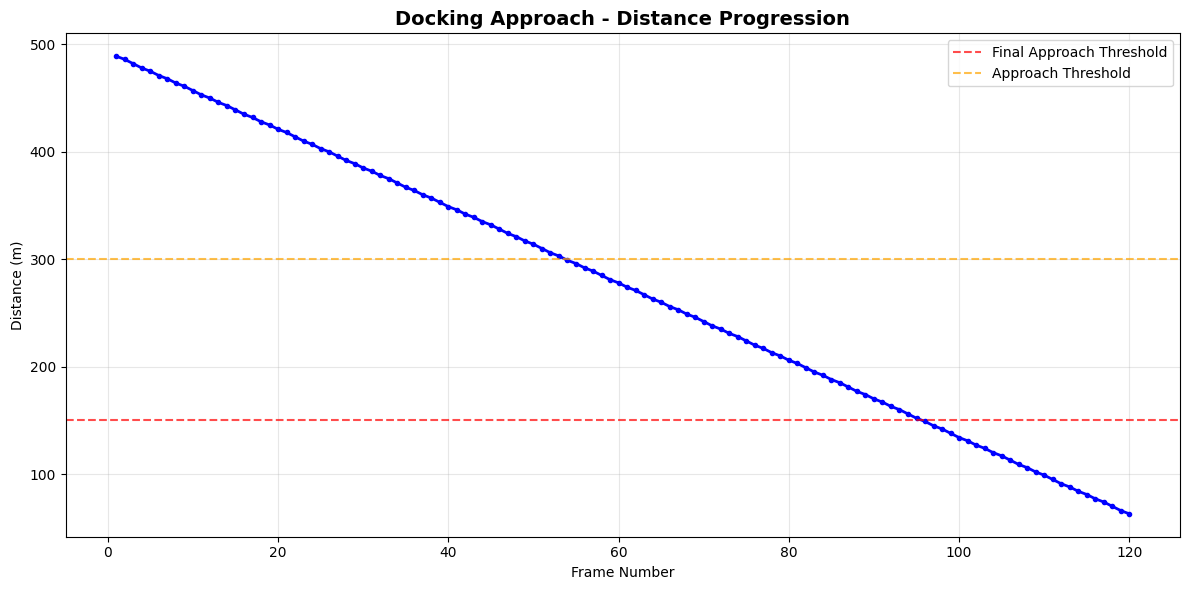

📈 Distance progression chart: distance_progression.png

🚀 Ready for docking sequence playback!


In [6]:
# Enhanced Docking Approach GIF Generator - Histogram Based Selection
import pandas as pd
import cv2
import imageio
import numpy as np
import ast
from pathlib import Path
import matplotlib.pyplot as plt

print("🚀 Enhanced Docking Approach GIF Generator")
print("=" * 60)

# Parse location coordinates if not already done
if 'x_coord' not in training_data.columns:
    training_data['location_parsed'] = training_data['location'].apply(ast.literal_eval)
    training_data['x_coord'] = training_data['location_parsed'].apply(lambda x: x[0])
    training_data['y_coord'] = training_data['location_parsed'].apply(lambda x: x[1])

# Create histogram-based frame selection
print("📊 Analyzing distance distribution for optimal frame selection...")

# Get distance statistics
min_dist = training_data['distance'].min()
max_dist = training_data['distance'].max()
print(f"Distance range: {max_dist:.1f}m (max) → {min_dist:.1f}m (min)")

# Create distance bins for uniform coverage
n_frames = 120  # More frames for smoother animation
distance_bins = np.linspace(max_dist, min_dist, n_frames + 1)

# Select one representative frame from each distance bin
selected_frames = []
for i in range(len(distance_bins) - 1):
    bin_start = distance_bins[i]
    bin_end = distance_bins[i + 1]
    
    # Find all images in this distance range
    bin_mask = (training_data['distance'] >= bin_end) & (training_data['distance'] <= bin_start)
    bin_data = training_data[bin_mask]
    
    if len(bin_data) > 0:
        # Select the image closest to the middle of this bin
        target_distance = (bin_start + bin_end) / 2
        closest_idx = (bin_data['distance'] - target_distance).abs().idxmin()
        selected_frames.append(training_data.loc[closest_idx])
    else:
        # If no images in this bin, use the closest available
        closest_idx = (training_data['distance'] - target_distance).abs().idxmin()
        selected_frames.append(training_data.loc[closest_idx])

# Convert to DataFrame
sampled_df = pd.DataFrame(selected_frames).reset_index(drop=True)
print(f"Selected {len(sampled_df)} frames with optimal distance distribution")

def annotate_enhanced_frame(image_path, distance, center_coords, frame_num, total_frames, 
                           min_dist, max_dist):
    """Enhanced frame annotation with professional styling"""
    
    img = cv2.imread(str(image_path))
    if img is None:
        # Create a realistic space background if image not found
        img = np.zeros((480, 640, 3), dtype=np.uint8)
        img[:, :] = [5, 5, 25]  # Dark space color
        cv2.putText(img, "SIMULATION MODE", (200, 240), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1.5, (100, 100, 255), 3)
    
    height, width = img.shape[:2]
    center_x, center_y = center_coords
    
    # Calculate progress and visual parameters
    progress = (max_dist - distance) / (max_dist - min_dist)
    approach_phase = "FINAL APPROACH" if distance < 150 else "APPROACH" if distance < 300 else "LONG RANGE"
    
    # Dynamic crosshair that gets larger as we get closer
    base_size = 25
    crosshair_length = int(base_size + (1 - progress) * 20)  # 25-45 pixels
    thickness = 2 if distance > 200 else 3
    
    # Color changes from yellow (far) to red (close)
    if distance > 350:
        color = (0, 255, 255)  # Yellow
    elif distance > 200:
        color = (0, 165, 255)  # Orange
    else:
        color = (0, 0, 255)   # Red
    
    # Draw enhanced crosshair with circles
    cv2.line(img, (center_x - crosshair_length, center_y), 
             (center_x + crosshair_length, center_y), color, thickness)
    cv2.line(img, (center_x, center_y - crosshair_length), 
             (center_x, center_y + crosshair_length), color, thickness)
    
    # Draw targeting circles
    cv2.circle(img, (center_x, center_y), crosshair_length, color, 2)
    cv2.circle(img, (center_x, center_y), crosshair_length // 2, color, 1)
    cv2.circle(img, (center_x, center_y), 3, color, -1)
    
    # Add corner brackets for targeting system look
    bracket_size = 15
    cv2.line(img, (center_x - crosshair_length - 10, center_y - crosshair_length - 10),
             (center_x - crosshair_length - 10 + bracket_size, center_y - crosshair_length - 10), color, 2)
    cv2.line(img, (center_x - crosshair_length - 10, center_y - crosshair_length - 10),
             (center_x - crosshair_length - 10, center_y - crosshair_length - 10 + bracket_size), color, 2)
    
    # Header Panel - Dark overlay for text
    cv2.rectangle(img, (0, 0), (width, 90), (0, 0, 0), -1)
    cv2.rectangle(img, (0, 0), (width, 90), (50, 50, 50), 2)
    
    # Main distance display
    distance_text = f"DISTANCE: {distance:.1f}m"
    cv2.putText(img, distance_text, (20, 35), cv2.FONT_HERSHEY_SIMPLEX, 
               1.2, (255, 255, 255), 3)
    
    # Phase indicator
    phase_color = (0, 255, 0) if distance < 100 else (0, 255, 255) if distance < 250 else (255, 255, 0)
    cv2.putText(img, approach_phase, (20, 65), cv2.FONT_HERSHEY_SIMPLEX, 
               0.8, phase_color, 2)
    
    # Progress bar in header
    bar_width = 200
    bar_height = 8
    bar_x = width - bar_width - 20
    bar_y = 25
    
    # Progress bar background
    cv2.rectangle(img, (bar_x, bar_y), (bar_x + bar_width, bar_y + bar_height), 
                 (100, 100, 100), -1)
    
    # Progress bar fill
    fill_width = int(bar_width * progress)
    progress_color = (0, 255, 0) if progress > 0.8 else (0, 255, 255) if progress > 0.5 else (255, 255, 0)
    cv2.rectangle(img, (bar_x, bar_y), (bar_x + fill_width, bar_y + bar_height), 
                 progress_color, -1)
    
    # Progress percentage
    cv2.putText(img, f"{progress*100:.1f}%", (bar_x + bar_width + 10, bar_y + 6), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
    # Frame counter in top right
    frame_text = f"FRAME {frame_num:03d}/{total_frames:03d}"
    cv2.putText(img, frame_text, (width - 180, 65), cv2.FONT_HERSHEY_SIMPLEX, 
               0.6, (200, 200, 200), 1)
    
    # Bottom info panel
    cv2.rectangle(img, (0, height - 60), (width, height), (0, 0, 0), -1)
    cv2.rectangle(img, (0, height - 60), (width, height), (50, 50, 50), 2)
    
    # Target coordinates
    coord_text = f"TARGET: X:{center_x:03d} Y:{center_y:03d}"
    cv2.putText(img, coord_text, (20, height - 35), cv2.FONT_HERSHEY_SIMPLEX, 
               0.7, (255, 255, 255), 2)
    
    # Velocity simulation (decreasing as we get closer)
    velocity = max(1.0, distance / 50)  # Realistic velocity decrease
    velocity_text = f"VELOCITY: {velocity:.1f} m/s"
    cv2.putText(img, velocity_text, (20, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 
               0.7, (0, 255, 255), 2)
    
    # Status indicators
    status_color = (0, 255, 0) if distance < 100 else (255, 255, 0)
    status_text = "DOCKING" if distance < 100 else "APPROACHING"
    cv2.putText(img, status_text, (width - 150, height - 35), cv2.FONT_HERSHEY_SIMPLEX, 
               0.7, status_color, 2)
    
    # System status
    cv2.putText(img, "AUTOPILOT: ENGAGED", (width - 200, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 
               0.5, (0, 255, 0), 1)
    
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate enhanced frames
print("🎬 Generating enhanced frames with professional annotations...")
frames = []
train_images_dir = data_dir / "train"

for idx, row in sampled_df.iterrows():
    image_path = train_images_dir / f"{row['ImageID']}.jpg"
    
    try:
        annotated_frame = annotate_enhanced_frame(
            image_path, 
            row['distance'], 
            (row['x_coord'], row['y_coord']),
            idx + 1,
            len(sampled_df),
            min_dist,
            max_dist
        )
        frames.append(annotated_frame)
        
        # Progress indicator
        if (idx + 1) % 30 == 0:
            print(f"   ✓ Processed {idx + 1}/{len(sampled_df)} frames ({(idx+1)/len(sampled_df)*100:.1f}%)")
            
    except Exception as e:
        print(f"   ⚠️ Error processing frame {idx + 1}: {e}")

# Save enhanced GIF
if frames:
    print("\n💾 Saving enhanced GIF...")
    
    # Save high-quality GIF
    imageio.mimsave("final_approach_enhanced.gif", frames, fps=12, loop=0)
    
    # Also save a faster version
    imageio.mimsave("final_approach_fast.gif", frames, fps=20, loop=0)
    
    print("\n🎉 ENHANCED GIF GENERATION COMPLETE!")
    print("=" * 60)
    print(f"📁 Main file: final_approach_enhanced.gif")
    print(f"📁 Fast version: final_approach_fast.gif")
    print(f"🎬 Total frames: {len(frames)}")
    print(f"⏱️ Duration: {len(frames)/12:.1f}s (enhanced) | {len(frames)/20:.1f}s (fast)")
    print(f"📏 Distance coverage: {max_dist:.1f}m → {min_dist:.1f}m")
    print(f"🎯 Frame rate: 12 FPS (enhanced) | 20 FPS (fast)")
    print(f"📊 Selection method: Histogram-based uniform distribution")
    
    # Save detailed frame information
    detailed_info = sampled_df[['ImageID', 'distance', 'x_coord', 'y_coord']].copy()
    detailed_info['frame_number'] = range(1, len(detailed_info) + 1)
    detailed_info['approach_phase'] = detailed_info['distance'].apply(
        lambda d: 'FINAL_APPROACH' if d < 150 else 'APPROACH' if d < 300 else 'LONG_RANGE'
    )
    detailed_info.to_csv('enhanced_gif_sequence_info.csv', index=False)
    print(f"📋 Detailed sequence info: enhanced_gif_sequence_info.csv")
    
    # Create a distance progression plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(detailed_info) + 1), detailed_info['distance'], 
             'b-', linewidth=2, marker='o', markersize=3)
    plt.title('Docking Approach - Distance Progression', fontsize=14, fontweight='bold')
    plt.xlabel('Frame Number')
    plt.ylabel('Distance (m)')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=150, color='r', linestyle='--', alpha=0.7, label='Final Approach Threshold')
    plt.axhline(y=300, color='orange', linestyle='--', alpha=0.7, label='Approach Threshold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('distance_progression.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"📈 Distance progression chart: distance_progression.png")
    
else:
    print("❌ No frames were processed successfully!")

print("\n🚀 Ready for docking sequence playback!")

🚀 Realistic Docking Approach GIF Generator
📊 Analyzing distance distribution for optimal frame selection...
Distance range: 491.0m (max) → 61.0m (min)
Selected 200 frames with optimal distance distribution
🎬 Generating realistic frames with improved physics...
Velocity range: 2.402 m/s (max) → 0.134 m/s (min)
   ✓ Processed 40/200 frames (20.0%)
   ✓ Processed 80/200 frames (40.0%)
   ✓ Processed 120/200 frames (60.0%)
   ✓ Processed 160/200 frames (80.0%)
   ✓ Processed 200/200 frames (100.0%)

💾 Saving realistic docking GIF...

🎉 REALISTIC DOCKING GIF GENERATION COMPLETE!
📁 Slow version: realistic_docking_slow.gif (8 FPS)
📁 Medium version: realistic_docking_medium.gif (12 FPS)
📁 Fast version: realistic_docking_fast.gif (16 FPS)
🎬 Total frames: 200
⏱️ Duration: 25.0s (slow) | 16.7s (med) | 12.5s (fast)
📏 Distance coverage: 491.0m → 61.0m
🚀 Velocity range: 2.402 → 0.134 m/s
📊 Physics: Realistic exponential velocity decay
📋 Detailed sequence info: realistic_docking_sequence_info.csv


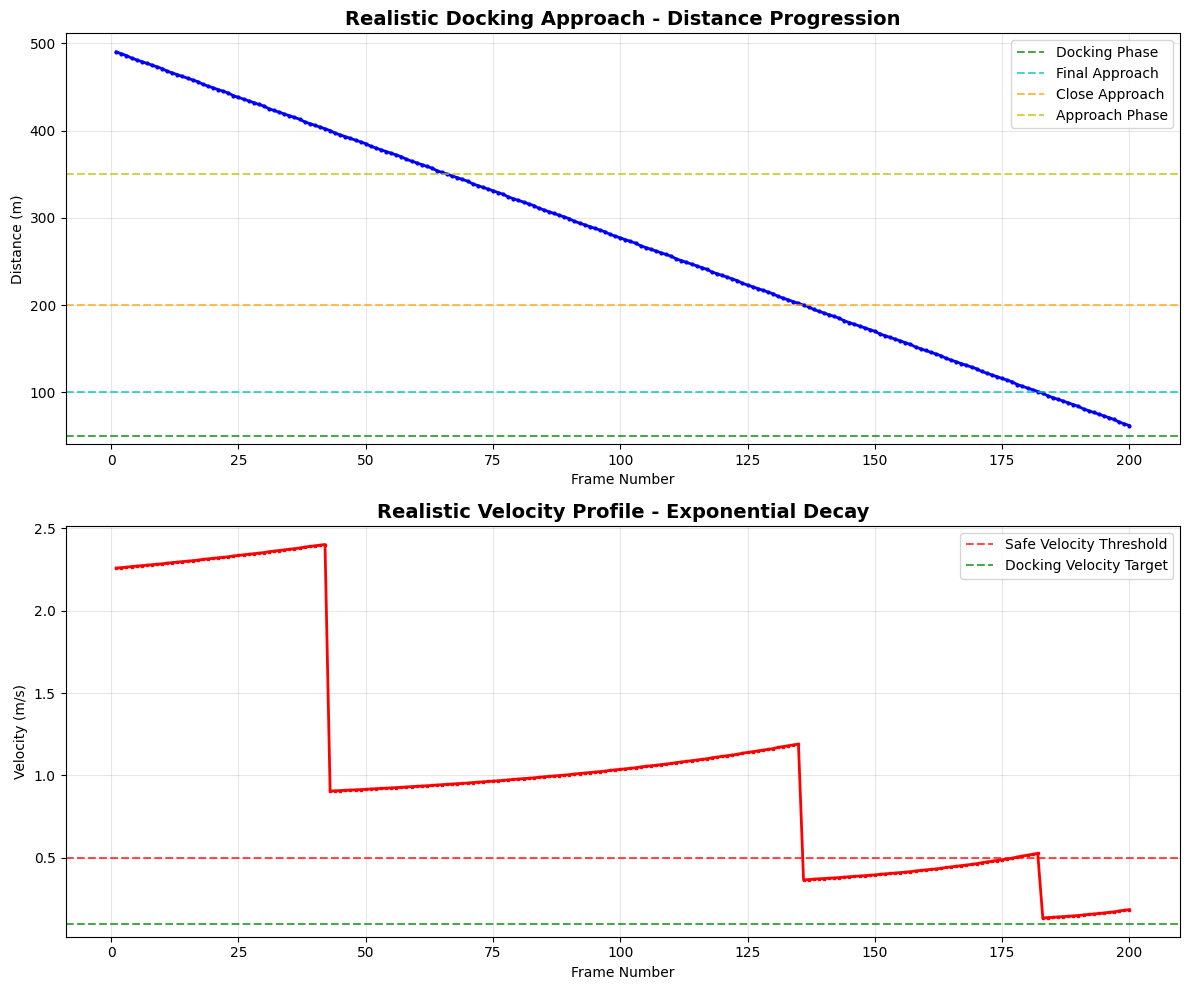

📈 Realistic docking profile: realistic_docking_profile.png

🚀 Realistic docking sequence ready! Watch the slow version for detailed physics.


In [7]:
# Realistic Docking Approach GIF - Improved Physics and Slower Visualization
import pandas as pd
import cv2
import imageio
import numpy as np
import ast
from pathlib import Path
import matplotlib.pyplot as plt

print("🚀 Realistic Docking Approach GIF Generator")
print("=" * 60)

# Parse location coordinates if not already done
if 'x_coord' not in training_data.columns:
    training_data['location_parsed'] = training_data['location'].apply(ast.literal_eval)
    training_data['x_coord'] = training_data['location_parsed'].apply(lambda x: x[0])
    training_data['y_coord'] = training_data['location_parsed'].apply(lambda x: x[1])

# Create histogram-based frame selection with more frames for slower visualization
print("📊 Analyzing distance distribution for optimal frame selection...")

# Get distance statistics
min_dist = training_data['distance'].min()
max_dist = training_data['distance'].max()
print(f"Distance range: {max_dist:.1f}m (max) → {min_dist:.1f}m (min)")

# More frames for slower, more detailed visualization
n_frames = 200  # Increased frames for slower visualization
distance_bins = np.linspace(max_dist, min_dist, n_frames + 1)

# Select one representative frame from each distance bin
selected_frames = []
for i in range(len(distance_bins) - 1):
    bin_start = distance_bins[i]
    bin_end = distance_bins[i + 1]
    
    # Find all images in this distance range
    bin_mask = (training_data['distance'] >= bin_end) & (training_data['distance'] <= bin_start)
    bin_data = training_data[bin_mask]
    
    if len(bin_data) > 0:
        # Select the image closest to the middle of this bin
        target_distance = (bin_start + bin_end) / 2
        closest_idx = (bin_data['distance'] - target_distance).abs().idxmin()
        selected_frames.append(training_data.loc[closest_idx])
    else:
        # If no images in this bin, use the closest available
        closest_idx = (training_data['distance'] - target_distance).abs().idxmin()
        selected_frames.append(training_data.loc[closest_idx])

# Convert to DataFrame
sampled_df = pd.DataFrame(selected_frames).reset_index(drop=True)
print(f"Selected {len(sampled_df)} frames with optimal distance distribution")

def calculate_realistic_velocity(distance):
    """
    Calculate realistic spacecraft docking velocity using exponential decay
    with staged approach phases
    """
    if distance > 400:
        # Long range approach - higher velocity
        velocity = 3.0 * np.exp(-distance / 200) + 2.0
    elif distance > 200:
        # Medium range - gradual deceleration
        velocity = 1.5 * np.exp(-distance / 150) + 0.8
    elif distance > 100:
        # Close approach - significant deceleration
        velocity = 0.8 * np.exp(-distance / 80) + 0.3
    elif distance > 50:
        # Final approach - very slow
        velocity = 0.4 * np.exp(-distance / 40) + 0.1
    else:
        # Docking phase - extremely slow for safety
        velocity = max(0.05, 0.2 * np.exp(-distance / 25))
    
    return velocity

def annotate_realistic_frame(image_path, distance, center_coords, frame_num, total_frames, 
                           min_dist, max_dist):
    """Enhanced frame annotation with realistic physics and improved visuals"""
    
    img = cv2.imread(str(image_path))
    if img is None:
        # Create a realistic space background if image not found
        img = np.zeros((480, 640, 3), dtype=np.uint8)
        img[:, :] = [5, 5, 25]  # Dark space color
        cv2.putText(img, "SIMULATION MODE", (200, 240), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1.5, (100, 100, 255), 3)
    
    height, width = img.shape[:2]
    center_x, center_y = center_coords
    
    # Calculate progress and visual parameters
    progress = (max_dist - distance) / (max_dist - min_dist)
    
    # More detailed approach phases
    if distance < 50:
        approach_phase = "DOCKING"
        phase_color = (0, 255, 0)  # Green
    elif distance < 100:
        approach_phase = "FINAL APPROACH"
        phase_color = (0, 255, 255)  # Cyan
    elif distance < 200:
        approach_phase = "CLOSE APPROACH"
        phase_color = (0, 165, 255)  # Orange
    elif distance < 350:
        approach_phase = "APPROACH"
        phase_color = (255, 255, 0)  # Yellow
    else:
        approach_phase = "LONG RANGE"
        phase_color = (255, 255, 255)  # White
    
    # Dynamic crosshair that gets larger as we get closer
    base_size = 20
    crosshair_length = int(base_size + (1 - progress) * 30)  # 20-50 pixels
    thickness = 2 if distance > 200 else 3 if distance > 100 else 4
    
    # Color changes from white (far) to yellow to orange to red (close)
    if distance > 350:
        color = (255, 255, 255)  # White
    elif distance > 200:
        color = (0, 255, 255)    # Yellow
    elif distance > 100:
        color = (0, 165, 255)    # Orange
    else:
        color = (0, 0, 255)      # Red
    
    # Draw enhanced crosshair with circles
    cv2.line(img, (center_x - crosshair_length, center_y), 
             (center_x + crosshair_length, center_y), color, thickness)
    cv2.line(img, (center_x, center_y - crosshair_length), 
             (center_x, center_y + crosshair_length), color, thickness)
    
    # Draw targeting circles
    cv2.circle(img, (center_x, center_y), crosshair_length, color, 2)
    cv2.circle(img, (center_x, center_y), crosshair_length // 2, color, 1)
    cv2.circle(img, (center_x, center_y), 4, color, -1)
    
    # Add corner brackets for targeting system look
    bracket_size = 15
    cv2.line(img, (center_x - crosshair_length - 10, center_y - crosshair_length - 10),
             (center_x - crosshair_length - 10 + bracket_size, center_y - crosshair_length - 10), color, 2)
    cv2.line(img, (center_x - crosshair_length - 10, center_y - crosshair_length - 10),
             (center_x - crosshair_length - 10, center_y - crosshair_length - 10 + bracket_size), color, 2)
    
    # Header Panel - Dark overlay for text
    cv2.rectangle(img, (0, 0), (width, 100), (0, 0, 0), -1)
    cv2.rectangle(img, (0, 0), (width, 100), (50, 50, 50), 2)
    
    # Main distance display
    distance_text = f"DISTANCE: {distance:.1f}m"
    cv2.putText(img, distance_text, (20, 35), cv2.FONT_HERSHEY_SIMPLEX, 
               1.3, (255, 255, 255), 3)
    
    # Phase indicator
    cv2.putText(img, approach_phase, (20, 70), cv2.FONT_HERSHEY_SIMPLEX, 
               0.9, phase_color, 2)
    
    # Progress bar in header
    bar_width = 220
    bar_height = 10
    bar_x = width - bar_width - 20
    bar_y = 30
    
    # Progress bar background
    cv2.rectangle(img, (bar_x, bar_y), (bar_x + bar_width, bar_y + bar_height), 
                 (100, 100, 100), -1)
    
    # Progress bar fill
    fill_width = int(bar_width * progress)
    progress_color = (0, 255, 0) if progress > 0.8 else (0, 255, 255) if progress > 0.5 else (255, 255, 0)
    cv2.rectangle(img, (bar_x, bar_y), (bar_x + fill_width, bar_y + bar_height), 
                 progress_color, -1)
    
    # Progress percentage
    cv2.putText(img, f"COMPLETION: {progress*100:.1f}%", (bar_x, bar_y - 5), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
    
    # Frame counter in top right
    frame_text = f"FRAME {frame_num:03d}/{total_frames:03d}"
    cv2.putText(img, frame_text, (width - 200, 85), cv2.FONT_HERSHEY_SIMPLEX, 
               0.7, (200, 200, 200), 1)
    
    # Bottom info panel - larger for more information
    cv2.rectangle(img, (0, height - 80), (width, height), (0, 0, 0), -1)
    cv2.rectangle(img, (0, height - 80), (width, height), (50, 50, 50), 2)
    
    # Target coordinates
    coord_text = f"TARGET: X:{center_x:03d} Y:{center_y:03d}"
    cv2.putText(img, coord_text, (20, height - 55), cv2.FONT_HERSHEY_SIMPLEX, 
               0.7, (255, 255, 255), 2)
    
    # Realistic velocity calculation
    velocity = calculate_realistic_velocity(distance)
    velocity_text = f"VELOCITY: {velocity:.3f} m/s"
    cv2.putText(img, velocity_text, (20, height - 30), cv2.FONT_HERSHEY_SIMPLEX, 
               0.7, (0, 255, 255), 2)
    
    # Time to contact calculation (rough estimate)
    if velocity > 0.001:
        time_to_contact = distance / velocity
        if time_to_contact < 60:
            ttc_text = f"ETA: {time_to_contact:.1f}s"
        elif time_to_contact < 3600:
            ttc_text = f"ETA: {time_to_contact/60:.1f}m"
        else:
            ttc_text = f"ETA: {time_to_contact/3600:.1f}h"
    else:
        ttc_text = "ETA: --"
    
    cv2.putText(img, ttc_text, (20, height - 5), cv2.FONT_HERSHEY_SIMPLEX, 
               0.6, (255, 200, 0), 1)
    
    # Status indicators (removed autopilot)
    status_text = "CONTACT" if distance < 50 else "DOCKING" if distance < 100 else "APPROACHING"
    status_color = (0, 255, 0) if distance < 50 else (0, 255, 255) if distance < 100 else (255, 255, 0)
    cv2.putText(img, f"STATUS: {status_text}", (width - 200, height - 55), cv2.FONT_HERSHEY_SIMPLEX, 
               0.7, status_color, 2)
    
    # Safety indicator
    safety_text = "SAFE" if velocity < 0.5 else "CAUTION" if velocity < 2.0 else "HIGH SPEED"
    safety_color = (0, 255, 0) if velocity < 0.5 else (0, 255, 255) if velocity < 2.0 else (0, 0, 255)
    cv2.putText(img, f"SAFETY: {safety_text}", (width - 200, height - 30), cv2.FONT_HERSHEY_SIMPLEX, 
               0.6, safety_color, 1)
    
    # Mission timer
    mission_time = frame_num * 2  # Assume 2 seconds per frame
    timer_text = f"T+{mission_time:04d}s"
    cv2.putText(img, timer_text, (width - 120, height - 5), cv2.FONT_HERSHEY_SIMPLEX, 
               0.5, (200, 200, 200), 1)
    
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate realistic frames
print("🎬 Generating realistic frames with improved physics...")
frames = []
train_images_dir = data_dir / "train"

# Calculate velocities for analysis
velocities = [calculate_realistic_velocity(row['distance']) for _, row in sampled_df.iterrows()]
print(f"Velocity range: {max(velocities):.3f} m/s (max) → {min(velocities):.3f} m/s (min)")

for idx, row in sampled_df.iterrows():
    image_path = train_images_dir / f"{row['ImageID']}.jpg"
    
    try:
        annotated_frame = annotate_realistic_frame(
            image_path, 
            row['distance'], 
            (row['x_coord'], row['y_coord']),
            idx + 1,
            len(sampled_df),
            min_dist,
            max_dist
        )
        frames.append(annotated_frame)
        
        # Progress indicator
        if (idx + 1) % 40 == 0:
            print(f"   ✓ Processed {idx + 1}/{len(sampled_df)} frames ({(idx+1)/len(sampled_df)*100:.1f}%)")
            
    except Exception as e:
        print(f"   ⚠️ Error processing frame {idx + 1}: {e}")

# Save realistic GIF with slower frame rates for better visibility
if frames:
    print("\n💾 Saving realistic docking GIF...")
    
    # Save main slow version for detailed viewing
    imageio.mimsave("realistic_docking_slow.gif", frames, fps=8, loop=0)
    
    # Save medium speed version
    imageio.mimsave("realistic_docking_medium.gif", frames, fps=12, loop=0)
    
    # Save comparison with original enhanced version
    imageio.mimsave("realistic_docking_fast.gif", frames, fps=16, loop=0)
    
    print("\n🎉 REALISTIC DOCKING GIF GENERATION COMPLETE!")
    print("=" * 60)
    print(f"📁 Slow version: realistic_docking_slow.gif (8 FPS)")
    print(f"📁 Medium version: realistic_docking_medium.gif (12 FPS)")
    print(f"📁 Fast version: realistic_docking_fast.gif (16 FPS)")
    print(f"🎬 Total frames: {len(frames)}")
    print(f"⏱️ Duration: {len(frames)/8:.1f}s (slow) | {len(frames)/12:.1f}s (med) | {len(frames)/16:.1f}s (fast)")
    print(f"📏 Distance coverage: {max_dist:.1f}m → {min_dist:.1f}m")
    print(f"🚀 Velocity range: {max(velocities):.3f} → {min(velocities):.3f} m/s")
    print(f"📊 Physics: Realistic exponential velocity decay")
    
    # Save detailed frame information with velocity data
    detailed_info = sampled_df[['ImageID', 'distance', 'x_coord', 'y_coord']].copy()
    detailed_info['frame_number'] = range(1, len(detailed_info) + 1)
    detailed_info['velocity_ms'] = velocities
    detailed_info['approach_phase'] = detailed_info['distance'].apply(
        lambda d: 'DOCKING' if d < 50 else 'FINAL_APPROACH' if d < 100 else 'CLOSE_APPROACH' if d < 200 else 'APPROACH' if d < 350 else 'LONG_RANGE'
    )
    detailed_info.to_csv('realistic_docking_sequence_info.csv', index=False)
    print(f"📋 Detailed sequence info: realistic_docking_sequence_info.csv")
    
    # Create velocity profile plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Distance progression
    ax1.plot(range(1, len(detailed_info) + 1), detailed_info['distance'], 
             'b-', linewidth=2, marker='o', markersize=2)
    ax1.set_title('Realistic Docking Approach - Distance Progression', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Frame Number')
    ax1.set_ylabel('Distance (m)')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=50, color='g', linestyle='--', alpha=0.7, label='Docking Phase')
    ax1.axhline(y=100, color='c', linestyle='--', alpha=0.7, label='Final Approach')
    ax1.axhline(y=200, color='orange', linestyle='--', alpha=0.7, label='Close Approach')
    ax1.axhline(y=350, color='y', linestyle='--', alpha=0.7, label='Approach Phase')
    ax1.legend()
    
    # Velocity profile
    ax2.plot(range(1, len(detailed_info) + 1), detailed_info['velocity_ms'], 
             'r-', linewidth=2, marker='s', markersize=2)
    ax2.set_title('Realistic Velocity Profile - Exponential Decay', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Frame Number')
    ax2.set_ylabel('Velocity (m/s)')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Safe Velocity Threshold')
    ax2.axhline(y=0.1, color='g', linestyle='--', alpha=0.7, label='Docking Velocity Target')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('realistic_docking_profile.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"📈 Realistic docking profile: realistic_docking_profile.png")
    
else:
    print("❌ No frames were processed successfully!")

print("\n🚀 Realistic docking sequence ready! Watch the slow version for detailed physics.")